In [565]:
# libraries we have used
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

import sklearn

In [566]:
#================================STEP 1:  IMPORTING DATASETS AND BASIC INFO==============================================

In [567]:

# importing the datset and naming the columns according to the dataset source

# datset source http://205.174.165.80/CICDataset/NSL-KDD/Dataset/


# column names imported from the datset


col_names = ["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","label","difficulty"]

# importing the train data into pandas dataframe
data = pd.read_csv("KDDTrain+.csv", header = None, names = col_names)


#importing the test data into pandas dataframe
data_test = pd.read_csv("KDDTest+.csv", header =None, names= col_names)



In [568]:
# displaying the first five rows of dataset

data.head(20)


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,difficulty
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21
5,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,neptune,21
6,0,tcp,private,S0,0,0,0,0,0,0,...,0.04,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,21
7,0,tcp,private,S0,0,0,0,0,0,0,...,0.06,0.07,0.00,0.00,1.00,1.00,0.00,0.00,neptune,21
8,0,tcp,remote_job,S0,0,0,0,0,0,0,...,0.09,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,21
9,0,tcp,private,S0,0,0,0,0,0,0,...,0.05,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune,21


In [569]:
# showing the number of rows and columns in the data
data.shape


(125973, 43)

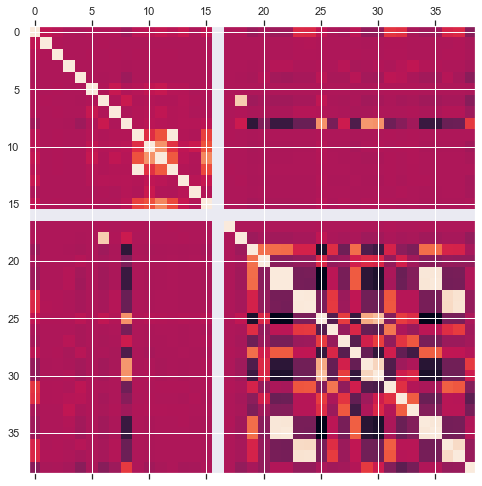

In [570]:
# applying the correlation between the features to check the desity of inter feature relation
plt.matshow(data.corr())# this function shows all the correlation between the featues so we can check which feature is more strongly connected to other feature

In [571]:
 # as per the research paper  A Detailed analysis of the KDD CUP 99 Data Set there are total four kinds of attacks found in this dataset
'''
   1) Denial of Service Attack (DoS): is an attack in
which the attacker makes some computing or memory
resource too busy or too full to handle legitimate requests,
or denies legitimate users access to a machine.
2) User to Root Attack (U2R): is a class of exploit in
which the attacker starts out with access to a normal
user account on the system (perhaps gained by snifﬁng
passwords, a dictionary attack, or social engineering)
and is able to exploit some vulnerability to gain root
access to the system.
3) Remote to Local Attack (R2L): occurs when an
attacker who has the ability to send packets to a
machine over a network but who does not have an
account on that machine exploits some vulnerability to
gain local access as a user of that machine.
4) Probing Attack: is an attempt to gather information
about a network of computers for the apparent purpose
of circumventing its security controls.
   '''
# we will now intruduce a new column of attack class which is determined by the mappings provided for each attack
    
    

'\n  1) Denial of Service Attack (DoS): is an attack in\nwhich the attacker makes some computing or memory\nresource too busy or too full to handle legitimate requests,\nor denies legitimate users access to a machine.\n2) User to Root Attack (U2R): is a class of exploit in\nwhich the attacker starts out with access to a normal\nuser account on the system (perhaps gained by snifﬁng\npasswords, a dictionary attack, or social engineering)\nand is able to exploit some vulnerability to gain root\naccess to the system.\n3) Remote to Local Attack (R2L): occurs when an\nattacker who has the ability to send packets to a\nmachine over a network but who does not have an\naccount on that machine exploits some vulnerability to\ngain local access as a user of that machine.\n4) Probing Attack: is an attempt to gather information\nabout a network of computers for the apparent purpose\nof circumventing its security controls.\n  '

In [572]:
# =======================================STEP 2: SIMPLIFYING THE FEATURE (LABEL) TO IMPROVE RESULT=======================================================

In [573]:
'''first of all as mentioned above we are going to replace the label column by 4 mentioned types of attacks and to replace it
for each label we must have some mapping or scheme. so below is the mapping provided by the source:

'''
# furthermore this step will make us easy to detect intrusions and apply ml algorithms

mapping = {'ipsweep': 'Probe','satan': 'Probe','nmap': 'Probe','portsweep': 'Probe','saint': 'Probe','mscan': 'Probe',
        'teardrop': 'DoS','pod': 'DoS','land': 'DoS','back': 'DoS','neptune': 'DoS','smurf': 'DoS','mailbomb': 'DoS',
        'udpstorm': 'DoS','apache2': 'DoS','processtable': 'DoS',
        'perl': 'U2R','loadmodule': 'U2R','rootkit': 'U2R','buffer_overflow': 'U2R','xterm': 'U2R','ps': 'U2R',
        'sqlattack': 'U2R','httptunnel': 'U2R',
        'ftp_write': 'R2L','phf': 'R2L','guess_passwd': 'R2L','warezmaster': 'R2L','warezclient': 'R2L','imap': 'R2L',
        'spy': 'R2L','multihop': 'R2L','named': 'R2L','snmpguess': 'R2L','worm': 'R2L','snmpgetattack': 'R2L',
        'xsnoop': 'R2L','xlock': 'R2L','sendmail': 'R2L',
        'normal': 'Normal'
        }



# now replacing the label with  a new column attack class


data['attack_class'] = data['label'].apply(lambda v: mapping[v])
data_test['attack_class'] = data_test['label'].apply(lambda v: mapping[v])

# dropping the old label column which we dont need now
data.drop(['label'], axis=1, inplace=True)
data_test.drop(['label'], axis=1, inplace=True)

In [574]:
data['attack_class']

0         Normal
1         Normal
2            DoS
3         Normal
4         Normal
           ...  
125968       DoS
125969    Normal
125970    Normal
125971       DoS
125972    Normal
Name: attack_class, Length: 125973, dtype: object

In [575]:
data.head(20)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,difficulty,attack_class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,20,Normal
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,15,Normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,19,DoS
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,21,Normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,21,Normal
5,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,21,DoS
6,0,tcp,private,S0,0,0,0,0,0,0,...,0.04,0.05,0.00,0.00,1.00,1.00,0.00,0.00,21,DoS
7,0,tcp,private,S0,0,0,0,0,0,0,...,0.06,0.07,0.00,0.00,1.00,1.00,0.00,0.00,21,DoS
8,0,tcp,remote_job,S0,0,0,0,0,0,0,...,0.09,0.05,0.00,0.00,1.00,1.00,0.00,0.00,21,DoS
9,0,tcp,private,S0,0,0,0,0,0,0,...,0.05,0.06,0.00,0.00,1.00,1.00,0.00,0.00,21,DoS


In [576]:
#=========================STEP3: EDA Exploratory Data Analysis===============================================

In [577]:
# feature wise statistical analysis
data.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,difficulty
count,125973.00000,1.259730e+05,1.259730e+05,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,...,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,287.14465,4.556674e+04,1.977911e+04,0.000198,0.022687,0.000111,0.204409,0.001222,0.395736,0.279250,...,115.653005,0.521242,0.082951,0.148379,0.032542,0.284452,0.278485,0.118832,0.120240,19.504060
std,2604.51531,5.870331e+06,4.021269e+06,0.014086,0.253530,0.014366,2.149968,0.045239,0.489010,23.942042,...,110.702741,0.448949,0.188922,0.308997,0.112564,0.444784,0.445669,0.306557,0.319459,2.291503
min,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000
50%,0.00000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
75%,0.00000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000,21.000000
max,42908.00000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,...,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


In [578]:
data['attack_class'].describe()

count     125973
unique         5
top       Normal
freq       67343
Name: attack_class, dtype: object

In [579]:
# checking the distribution trends among the attack classses

# calculating the frequency of each type of attack

attack_class_frequency = data[['attack_class']].apply(lambda x: x.value_counts())

attack_class_frequency['frequency_percent_train'] = (100 * attack_class_frequency / attack_class_frequency.sum())
attack_class_distribution = pd.concat([attack_class_frequency], axis=1)
attack_class_distribution

,attack_class,frequency_percent_train
Normal,67343,53.458281
DoS,45927,36.457812
Probe,11656,9.252776
R2L,995,0.789852
U2R,52,0.041279


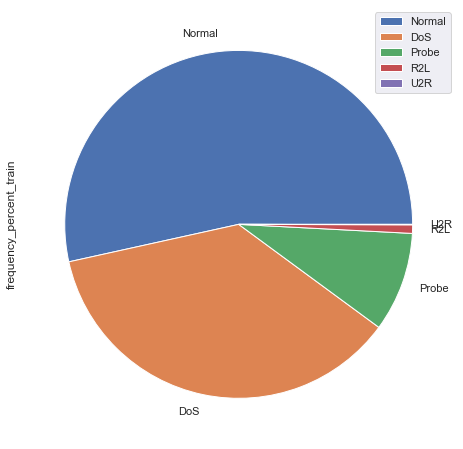

In [580]:
# visual representation of above results

plotting_freq = attack_class_distribution[['frequency_percent_train']].plot(kind="pie",subplots=True)

In [581]:
#=================================STEP 4 : DATA PREPROCESSING ========================================================

In [582]:

# pre-processing refers to the transformations applied to 
#your data before feeding it to the algorithm. In python, scikit-learn library has a
# pre-built functionality under sklearn.preprocessing.


In [583]:
#importing the scaler 
# scaling is used only for numerical 
# standard scaling has been used to minimize the variance in features including  continous numbers
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()



In [584]:
# showing the results of numerical features after applying scaler(converted to np array) MUST BE CONVERTED BACK TO data_testFRAME

numerical_f=[]
for col in data.columns.values:
# Encoding only categorical variables
    if data[col].dtypes=='float64'or data[col].dtypes=='int64':
        numerical_f.append(data[col].name)
        
        
data[numerical_f] = scaler.fit_transform(data[numerical_f])
        
data[numerical_f]=scaler.fit_transform(data[numerical_f])
data






for col in data_test.columns.values:
# Encoding only numerical variables
    if data_test[col].dtypes=='float64'or data_test[col].dtypes=='int64':
        numerical_f.append(data_test[col].name)
        
        
data_test[numerical_f] = scaler.fit_transform(data_test[numerical_f])
        
data_test[numerical_f]=scaler.fit_transform(data_test[numerical_f])
data_test

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,difficulty,attack_class
0,-0.155534,tcp,private,REJ,-0.021988,-0.096896,-0.017624,-0.059104,-0.019459,-0.113521,...,-1.305370,-0.138370,-0.431856,-0.229980,-0.358118,-0.35275,1.979791,1.929116,0.698325,DoS
1,-0.155534,tcp,private,REJ,-0.021988,-0.096896,-0.017624,-0.059104,-0.019459,-0.113521,...,-1.397181,-0.138370,-0.431856,-0.229980,-0.358118,-0.35275,1.979791,1.929116,0.698325,DoS
2,-0.154113,tcp,ftp_data,SF,0.005473,-0.096896,-0.017624,-0.059104,-0.019459,-0.113521,...,0.002934,-0.228985,1.559906,0.004234,-0.358118,-0.35275,-0.602719,-0.565483,0.698325,Normal
3,-0.155534,icmp,eco_i,SF,-0.021946,-0.096896,-0.017624,-0.059104,-0.019459,-0.113521,...,0.898090,-0.410217,2.833328,3.049016,-0.358118,-0.35275,-0.602719,-0.565483,-0.706739,Probe
4,-0.154823,tcp,telnet,RSTO,-0.021988,-0.096189,-0.017624,-0.059104,-0.019459,-0.113521,...,-0.685647,0.360018,-0.333901,0.004234,-0.358118,-0.35275,1.540764,1.205682,-1.643449,Probe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,-0.155534,tcp,smtp,SF,-0.020309,-0.081202,-0.017624,-0.059104,-0.019459,-0.113521,...,0.255414,-0.138370,-0.399204,-0.112873,-0.321505,-0.35275,-0.602719,-0.565483,0.698325,Normal
22540,-0.155534,tcp,http,SF,-0.021318,-0.052690,-0.017624,-0.059104,-0.019459,-0.113521,...,0.898090,-0.410217,-0.399204,-0.112873,-0.321505,-0.35275,-0.602719,-0.565483,0.698325,Normal
22541,-0.155534,tcp,http,SF,0.093373,0.294926,-0.017624,-0.059104,-0.019459,2.040705,...,0.898090,-0.410217,-0.431856,-0.229980,-0.358118,-0.35275,-0.421943,-0.390861,-0.706739,DoS
22542,-0.155534,udp,domain_u,SF,-0.021899,-0.094917,-0.017624,-0.059104,-0.019459,-0.113521,...,0.875137,-0.364909,-0.431856,-0.229980,-0.358118,-0.35275,-0.602719,-0.565483,0.698325,Normal


In [585]:
# the next step of data preprocessing is to convert all the categorial attributes to encodings so they can be easily used 
# in the training models and provide more accurate results
#======================================== STEP 5FEATURE ENCODING==============================================

#Sklearn provides a very efficient tool for encoding the levels of a categorical features into numeric values
#. LabelEncoder encode labels with value between 0 and n_classes-1
#plus  one hot encoding to get more better results

'''A one hot encoding allows the representation of categorical data to be more expressive.

Many machine learning algorithms cannot work with categorical data directly. The categories 
must be converted into numbers. This is required for both input and output variables that are categorical.
'''

encoded_names=[]#later to be used on
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()


# dropping the attack class because we dont need its encodings



# Iterating over all the common columns in train data

for col in data.columns.values:
# Encoding only categorical variables
    if data[col].dtypes=='object':
        encoded_names.append(data[col].name)

        data[col]= le.fit_transform(data[col])
        
        
        
        


for col in data_test.columns.values:
# Encoding only categorical variables
    if data_test[col].dtypes=='object':

        data_test[col]= le.fit_transform(data_test[col])
        
        
        





# separate target column from encoded data 
encoded_train = data.drop(['attack_class'], axis=1)
encoded_test = data_test.drop(['attack_class'], axis=1)







Ytrain = data[['attack_class']].copy()
Ytest = data_test[['attack_class']].copy()




encoded_names



['protocol_type', 'service', 'flag', 'attack_class']

In [586]:
encoded_train  # all categorial data has been converted to encodings now they can be used in ml models

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,difficulty
0,-0.110249,1,20,9,-0.007679,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,-0.818890,-0.782367,-0.280282,0.069972,-0.289103,-0.639532,-0.624871,-0.224532,-0.376387,0.216426
1,-0.110249,2,44,9,-0.007737,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,-1.035688,-1.161030,2.736852,2.367737,-0.289103,-0.639532,-0.624871,-0.387635,-0.376387,-1.965556
2,-0.110249,1,49,5,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,-0.809857,-0.938287,-0.174417,-0.480197,-0.289103,1.608759,1.618955,-0.387635,-0.376387,-0.219970
3,-0.110249,1,24,9,-0.007723,-0.002891,-0.014089,-0.089486,-0.007736,-0.095076,...,1.258754,1.066401,-0.439078,-0.383108,0.066252,-0.572083,-0.602433,-0.387635,-0.345084,0.652823
4,-0.110249,1,24,9,-0.007728,-0.004814,-0.014089,-0.089486,-0.007736,-0.095076,...,1.258754,1.066401,-0.439078,-0.480197,-0.289103,-0.639532,-0.624871,-0.387635,-0.376387,0.652823
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,-0.110249,1,49,5,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,-0.818890,-0.938287,-0.121485,-0.480197,-0.289103,1.608759,1.618955,-0.387635,-0.376387,0.216426
125969,-0.107178,2,49,9,-0.007744,-0.004883,-0.014089,-0.089486,-0.007736,-0.095076,...,1.159389,0.977304,-0.386146,-0.447834,-0.289103,-0.639532,-0.624871,-0.387635,-0.376387,0.652823
125970,-0.110249,1,54,9,-0.007382,-0.004823,-0.014089,-0.089486,-0.007736,-0.095076,...,-0.773724,-0.893738,-0.121485,-0.480197,-0.289103,0.979238,-0.624871,-0.355014,-0.376387,-0.656367
125971,-0.110249,1,30,5,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,-0.972455,-1.094207,-0.174417,-0.480197,-0.289103,1.608759,1.618955,-0.387635,-0.376387,0.216426


In [587]:
# the next step is of data sampling in the dataset
#Data sampling is a statistical analysis technique used to select, 
#manipulate and analyze a representative subset of data points
#to identify patterns and trends in the larger data set being examined
#'''Random resampling provides a naive technique for rebalancing the class distribution for an imbalanced dataset.
#Random oversampling duplicates examples from the minority class in the training dataset and can result in overfitting for some models.
#Random undersampling deletes examples from the majority class and can result in losing information invaluable to a model.
#'''

In [588]:
# we apply random oversampling to balance the data by sampling the minority class with replacement

# reshape target column attack_class to 1D array shape 1 d array is made because the random oversampling requires so
c, r = Ytrain.values.shape
Ytrain = Ytrain.values.reshape(c,)
print(Ytrain.size ,'is the size of 1 dimensional np array ')
#reshaping the target column in test dataset
d, e = Ytest.values.shape
Ytest = Ytest.values.reshape(d,)


125973 is the size of 1 dimensional np array 


In [589]:
#importing the imbalanced learn library
from imblearn.over_sampling import RandomOverSampler 
from collections import Counter
#making a random over sampling function focused on over sampling the minority class
func = RandomOverSampler(sampling_strategy = 'minority')


#doing the oversampling in the training dataset
x_overs, y_overs = func.fit_resample(encoded_train,Ytrain)
#results of oversampling





#doing the oversampling in the training dataset
x_overs_test, y_overs_test = func.fit_resample(encoded_test,Ytest)
#results of oversampling
print('Original dataset shape {}'.format(Counter(Ytrain)))
print('Resampled dataset shape {}'.format(Counter(y_overs)))
print('Original dataset shape {}'.format(Counter(Ytest)))
print('Resampled dataset shape {}'.format(Counter(y_overs_test)))


Original dataset shape Counter({1: 67343, 0: 45927, 2: 11656, 3: 995, 4: 52})
Resampled dataset shape Counter({1: 67343, 4: 67343, 0: 45927, 2: 11656, 3: 995})
Original dataset shape Counter({1: 9711, 0: 7458, 3: 2754, 2: 2421, 4: 200})
Resampled dataset shape Counter({1: 9711, 4: 9711, 0: 7458, 3: 2754, 2: 2421})


In [590]:
#in the above output it can be observed that the oversampling has been done and minority classes have been filled with copies 
#to make the elements in minority calss greater so ml algorithm can give more accurate results

In [514]:
#=========================================STEP6 : FEATURE SELECTION======================================================
Ytest

array([0, 0, 1, ..., 0, 1, 2])

In [323]:
#in data science we have hundreds or even millions of features and we want a way to create a 
#model that only includes the most important features. This has three benefits. First, we make our model more simple
#to interpret. Second, we can reduce the variance of the model, and therefore overfitting. 
#Finally, we can reduce the computational cost (and time) of training a model. The process of 
#identifying only the most relevant features is called “feature selection'

In [324]:
# we will use random forest classifier algorithm for feature selection
#================================working of a random forest tree classifier=================================
#Random forests consist of 4 –12 hundred decision trees, each of them built over a random extraction of the observations 
#from the dataset and a random extraction of the features. Not every tree sees all the features or all the observations,
#and this guarantees that the trees are de-correlated and therefore less prone to over-fitting. Each tree is also a 
#sequence of yes-no questions based on a single or combination of features. At each node (this is at each question),
#the three divides the dataset into 2 buckets, each of them hosting observations that are more similar among themselves
#and different from the ones in the other bucket. Therefore, the importance of each feature is derived from how “pure”
#each of the buckets is.




In [515]:
from sklearn.ensemble.forest import RandomForestClassifier
 
classifier = RandomForestClassifier(n_estimators= 1000)

# it makes 100 trees can be made more to increase no of trees 
classifier.fit(x_overs, y_overs)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [516]:
#A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset 
#and uses averaging to improve the predictive accuracy and control over-fitting. The sub-sample size is always the same as 
#the original input sample size but the samples are drawn with replacement if


In [517]:
#plotting the importance of each selected feature  (rounding the data so it can be plotted)
print(classifier.feature_importances_)

[2.63529482e-02 1.82499693e-02 3.96693980e-02 4.98494511e-02
 5.95605480e-02 5.69087294e-02 2.19246581e-05 3.30369489e-03
 6.98564441e-06 9.88057985e-03 1.78470787e-04 1.25878229e-02
 5.47615365e-03 7.65304764e-03 2.96572329e-05 1.89449391e-03
 7.56558588e-03 5.11014910e-04 2.44110557e-05 0.00000000e+00
 0.00000000e+00 1.30573627e-03 3.70712786e-02 3.53077987e-02
 1.93485080e-02 1.86191662e-02 5.43793218e-03 3.33350823e-03
 4.15754481e-02 2.65800225e-02 5.52516497e-03 5.70359547e-02
 9.96766420e-02 2.01356204e-02 2.76565112e-02 3.41966351e-02
 9.46834127e-03 3.65181262e-02 2.58309114e-02 1.05848965e-02
 7.21311583e-03 1.77853795e-01]


In [518]:
score = np.round(classifier.feature_importances_,3)
score

array([0.026, 0.018, 0.04 , 0.05 , 0.06 , 0.057, 0.   , 0.003, 0.   ,
       0.01 , 0.   , 0.013, 0.005, 0.008, 0.   , 0.002, 0.008, 0.001,
       0.   , 0.   , 0.   , 0.001, 0.037, 0.035, 0.019, 0.019, 0.005,
       0.003, 0.042, 0.027, 0.006, 0.057, 0.1  , 0.02 , 0.028, 0.034,
       0.009, 0.037, 0.026, 0.011, 0.007, 0.178])

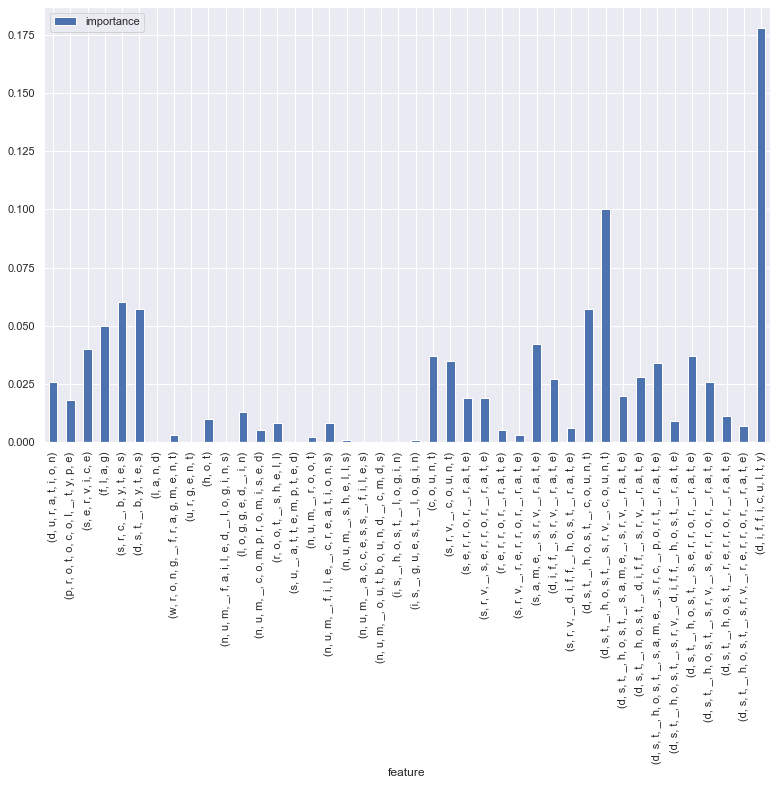

In [519]:
#create a dataframe to plot
plot_imp = pd.DataFrame({'feature':x_overs,'importance':score}).plot(kind='bar', x= 'feature')

In [520]:
#the results of random forest classifier are shown visually , we get clear idea of important features


In [521]:
#we can verify our results by of important features by using following function
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel #selection function already made by library
selector = SelectFromModel(RandomForestClassifier(n_estimators = 100))#applying forest classification
selector.fit(x_overs, y_overs) 
selected_feat= x_overs.columns[(selector.get_support())]#extracing the important features
print(selected_feat)

Index(['duration', 'service', 'flag', 'src_bytes', 'dst_bytes', 'count',
       'srv_count', 'same_srv_rate', 'dst_host_count', 'dst_host_srv_count',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_serror_rate', 'difficulty'],
      dtype='object')


In [610]:
#redesigning the dataset and using the one hot coding data preprocessing technique


X_train = x_overs[['service', 'flag', 'src_bytes', 'dst_bytes', 'count', 'srv_count',
       'srv_serror_rate', 'same_srv_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_src_port_rate',
       'dst_host_serror_rate', 'difficulty']]

X_test= encoded_test[['service', 'flag', 'src_bytes', 'dst_bytes', 'count', 'srv_count',
       'srv_serror_rate', 'same_srv_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_src_port_rate',
       'dst_host_serror_rate', 'difficulty']]
#making a simple dataframe for applying one hot encoding
X_data = pd.concat([X_train,X_test])




#calling the function 
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()


#specifically applying on the categorial features


Xcateg_1 = X_data[['service']].copy()

Xcateg_2 = X_data[['flag']].copy()
one_hot_encodings1 = enc.fit_transform(Xcateg_1).toarray()

one_hot_encodings2 = enc.fit_transform(Xcateg_2).toarray()
X_data = X_data.drop(['service'],axis=1)

X_data = X_data.drop(['flag'],axis=1)

X_data = np.concatenate([X_data.values,one_hot_encodings1],axis=1)

X_data = np.concatenate([X_data,one_hot_encodings2],axis=1)

In [611]:
X_data.shape

(215808, 92)

In [612]:
#now arranging the y in a single array
y_data=np.concatenate([Ytrain,Ytest])

y_data.shape




#shapping the x and y so they can be equal


X_data= X_data[:-67291, :]
X_data.shape


(148517, 92)

In [650]:
#now splitting the train and test equally



from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_data,y_data,test_size = 0.3)

X_test.shape




(44556, 92)

In [651]:
#======================================STEP 7: GAUSSIAN NAIVE BAYES THEOREM=======================================

In [652]:
#applying the training models on train data



from sklearn.naive_bayes import GaussianNB,BernoulliNB
from sklearn import metrics

In [653]:
Gaussian_model = GaussianNB() #  making the object of gaussian naive bayes
Gaussian_model.fit(X_train,Y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [654]:
predict_train_gaussian = Gaussian_model.predict(X_test)
print('Target on train data',predict_train_gaussian) 

Target on train data [1 0 1 ... 3 0 4]


In [655]:
classification_report = metrics.classification_report (Y_test, predict_train_gaussian)

In [656]:
print(classification_report) # we can show that using gaussian NB the results are very poor

              precision    recall  f1-score   support

           0       0.98      0.75      0.85     16025
           1       0.80      0.76      0.78     23076
           2       0.98      0.13      0.23      4256
           3       0.07      0.06      0.06      1128
           4       0.01      1.00      0.02        71

    accuracy                           0.68     44556
   macro avg       0.57      0.54      0.39     44556
weighted avg       0.86      0.68      0.73     44556



In [657]:
# now applying bernoulli NB for binary features that is bernoulli naive bayes
from sklearn.naive_bayes import BernoulliNB 
bernoulli_model = BernoulliNB()
bernoulli_model.fit(X_train,Y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [658]:
#results on train data
predict_train_bernoulli = bernoulli_model.predict(X_train)
print('Target on train data',predict_train_bernoulli) 
print('results on train data')
classification_report_bernoulli = metrics.classification_report (Y_train, predict_train_bernoulli)
print(classification_report_bernoulli)


Target on train data [0 2 1 ... 0 0 1]
results on train data
              precision    recall  f1-score   support

           0       0.94      0.77      0.85     37360
           1       0.94      0.83      0.88     53978
           2       0.67      0.69      0.68      9821
           3       0.14      0.84      0.24      2621
           4       0.00      0.00      0.00       181

    accuracy                           0.80    103961
   macro avg       0.54      0.63      0.53    103961
weighted avg       0.89      0.80      0.83    103961



In [659]:


#results on test data
      
predict_test_bernoulli= bernoulli_model.predict(X_test)

print('results on test data')
classification_report_bernoulli = metrics.classification_report (Y_test, predict_test_bernoulli)
print(classification_report_bernoulli)

results on test data
              precision    recall  f1-score   support

           0       0.94      0.77      0.85     16025
           1       0.94      0.83      0.89     23076
           2       0.67      0.69      0.68      4256
           3       0.14      0.85      0.25      1128
           4       0.00      0.00      0.00        71

    accuracy                           0.80     44556
   macro avg       0.54      0.63      0.53     44556
weighted avg       0.90      0.80      0.84     44556



In [660]:
Ytrain
#we can see from above results that test and train data from bernoulli Naive Bayes Algo give satisfactory prediction results

array([1, 1, 0, ..., 1, 0, 1])

In [661]:
cm = metrics.confusion_matrix(Y_train,predict_train_bernoulli)
cm

array([[28938,  2265,  1419,  4738,     0],
       [  436, 44832,  1783,  6923,     4],
       [ 1381,   164,  6750,  1526,     0],
       [    4,   295,   117,  2205,     0],
       [    0,     4,    14,   163,     0]], dtype=int64)

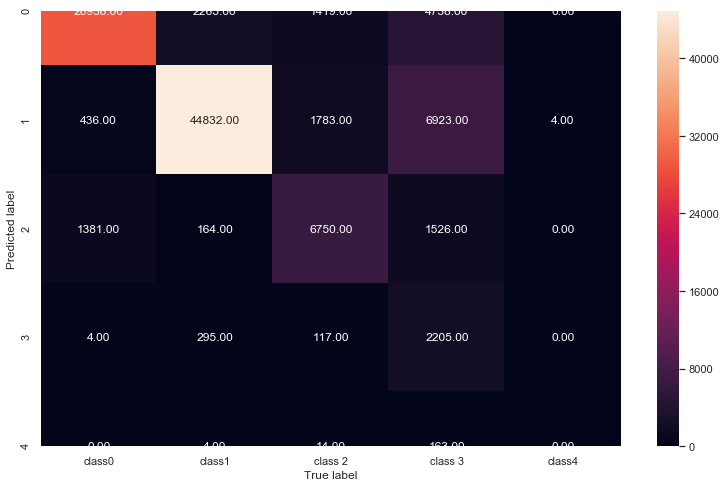

In [662]:


sn.heatmap(cm, annot=True,  fmt='.2f', xticklabels = ["class0", "class1","class 2","class 3","class4"] , yticklabels = ["0", "1","2","3","4"],cbar=True)
plt.xlabel('True label',fontsize=12)
plt.ylabel('Predicted label',fontsize=12)

sn.set(rc={'figure.figsize':(13,8)})

In [663]:
#results of applying bernoulli 


In [664]:
# ============================Step8 : Logistic Regression ===========================================================

In [665]:
from sklearn.linear_model import LogisticRegression

#multinomial logistic regression using saga algorithm
model_LR = LogisticRegression(solver = 'saga',multi_class='multinomial',max_iter=30000)

model_LR.fit(X_train,Y_train)

# # coefficeints of the trained model
# print('Coefficient of model :', model.coef_)

# # intercept of the model
# print('Intercept of model',model.intercept_)

# predict the target on the train dataset
predict_train_LR = model_LR.predict(X_train)
print('Target on train data',predict_train_LR) 



classification_report_LR = metrics.classification_report (Y_train, predict_train_LR)
print(classification_report_LR)


# Accuray Score on train dataset
accuracy_train_LR = metrics.accuracy_score(Y_train,predict_train_LR)
print('accuracy_score on train dataset : ', accuracy_train_LR)


Target on train data [0 2 1 ... 0 0 1]
              precision    recall  f1-score   support

           0       0.87      0.87      0.87     37360
           1       0.87      0.94      0.91     53978
           2       0.84      0.66      0.74      9821
           3       0.12      0.01      0.03      2621
           4       0.00      0.00      0.00       181

    accuracy                           0.87    103961
   macro avg       0.54      0.50      0.51    103961
weighted avg       0.85      0.87      0.85    103961

accuracy_score on train dataset :  0.8659882071161301


C:\Users\Rehan\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [666]:
#checking the results of logistic regression on test data

predict_test_LR = model_LR.predict(X_test)
print('Target on train data',predict_test_LR) 

classification_report_LR = metrics.classification_report (Y_test, predict_test_LR)
print(classification_report_LR)









# Accuray Score on train dataset
accuracy_test_LR = metrics.accuracy_score(Y_test,predict_test_LR)
print('accuracy_score on test dataset : ', accuracy_test_LR)

Target on train data [1 0 1 ... 1 0 0]
              precision    recall  f1-score   support

           0       0.87      0.87      0.87     16025
           1       0.87      0.95      0.91     23076
           2       0.84      0.65      0.73      4256
           3       0.10      0.01      0.02      1128
           4       0.00      0.00      0.00        71

    accuracy                           0.87     44556
   macro avg       0.54      0.50      0.51     44556
weighted avg       0.85      0.87      0.85     44556

accuracy_score on test dataset :  0.8656073256127121


C:\Users\Rehan\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [140]:
#if we use the basic two class logistic regression

for i in Ytrain:
    if i == 1:
        i=1
    else:
        i=0


In [141]:
# #=======================================Step 9logistic regression on two classes ============================
# model = LogisticRegression(solver = "liblinear",max_iter =3000)

# model.fit(X_train,Ytrain)

# # # coefficeints of the trained model
# # print('Coefficient of model :', model.coef_)

# # # intercept of the model
# # print('Intercept of model',model.intercept_)

# # predict the target on the train dataset
# predict_test = model.predict(X_test)
# print('Target on train data',predict_test) 


# accuracy_test = metrics.accuracy_score(Ytest,predict_test)
# print('accuracy_score on test dataset : ', accuracy_test)




Target on train data [0 0 1 ... 1 1 1]
accuracy_score on test dataset :  0.6250443577004968


In [667]:
#=======================================KNN classifier========================================================

from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
#defing the model



model_knn = KNeighborsClassifier()
model_knn.fit(X_train, Y_train)







KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [674]:

#getting the predictions on x train


predict_knn = model_knn.predict(X_train)
print(predict_knn)



# accuracy on X_train
# Accuracy Score on train dataset
accuracy_train_knn = metrics.accuracy_score(Y_train,predict_knn)
print('accuracy_score on train dataset : ', accuracy_train_knn)



[1 2 1 ... 0 0 1]
accuracy_score on train dataset :  0.900818576196843


In [669]:

predict_knn_test = model_knn.predict(X_test)
print(predict_knn_test)



# accuracy on X_train
# Accuracy Score on train dataset
accuracy_test_knn = metrics.accuracy_score(Y_test,predict_knn_test)
print('accuracy_score on train dataset : ', accuracy_test_knn)





classification_report_knn = metrics.classification_report (Y_test, predict_knn_test)
print(classification_report_knn)

[1 0 1 ... 1 0 0]
accuracy_score on train dataset :  0.8984199658856271
              precision    recall  f1-score   support

           0       0.86      0.93      0.89     16025
           1       0.93      0.92      0.93     23076
           2       0.91      0.82      0.86      4256
           3       0.69      0.26      0.38      1128
           4       0.00      0.00      0.00        71

    accuracy                           0.90     44556
   macro avg       0.68      0.59      0.61     44556
weighted avg       0.90      0.90      0.89     44556



C:\Users\Rehan\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [670]:
#=======================================Step 10: SVM==========================================================

In [673]:
from sklearn import svm


svm_model = svm.SVC(kernel = 'linear')
svm_model.fit(X_train,Y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [675]:

predict_svm = svm_model.predict(X_train)
print(predict_svm)



# accuracy on X_train
# Accuracy Score on train dataset
accuracy_test_svm = metrics.accuracy_score(Y_train,predict_svm)
print('accuracy_score on test dataset : ', accuracy_test_svm)





classification_report_knn = metrics.classification_report (Y_train, predict_svm)
print(classification_report_knn)

[0 2 1 ... 0 0 1]
accuracy_score on test dataset :  0.880137743961678
              precision    recall  f1-score   support

           0       0.94      0.85      0.89     37360
           1       0.85      0.98      0.91     53978
           2       0.91      0.69      0.78      9821
           3       1.00      0.00      0.00      2621
           4       0.00      0.00      0.00       181

    accuracy                           0.88    103961
   macro avg       0.74      0.50      0.52    103961
weighted avg       0.89      0.88      0.87    103961



C:\Users\Rehan\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [676]:
predict_svm = svm_model.predict(X_test)
print(predict_svm)



# accuracy on X_train
# Accuracy Score on train dataset
accuracy_test_svm = metrics.accuracy_score(Y_test,predict_svm)
print('accuracy_score on test dataset : ', accuracy_test_svm)





classification_report_knn = metrics.classification_report (Y_test, predict_svm)
print(classification_report_knn)

[1 0 1 ... 1 0 1]
accuracy_score on test dataset :  0.8802405961037795
              precision    recall  f1-score   support

           0       0.94      0.85      0.89     16025
           1       0.84      0.98      0.91     23076
           2       0.92      0.69      0.79      4256
           3       1.00      0.00      0.00      1128
           4       0.00      0.00      0.00        71

    accuracy                           0.88     44556
   macro avg       0.74      0.50      0.52     44556
weighted avg       0.89      0.88      0.87     44556



C:\Users\Rehan\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [677]:
#=============================Step 10 : Decision trees clasifier=========================================

In [683]:
from sklearn.tree import DecisionTreeClassifier

#calling the model and fitting in
dt = DecisionTreeClassifier()
dt.fit(X_train, Y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [684]:

predict_tree = dt.predict(X_train)
print(predict_tree)



# accuracy on X_train
# Accuracy Score on train dataset
accuracy_train_tree = metrics.accuracy_score(Y_train,predict_tree)
print('accuracy_score on test dataset : ', accuracy_train_tree)





classification_report_tree = metrics.classification_report (Y_train, predict_tree)
print(classification_report_tree)

[1 2 1 ... 0 0 1]
accuracy_score on test dataset :  0.9134675503313743
              precision    recall  f1-score   support

           0       0.99      0.86      0.92     37360
           1       0.86      1.00      0.92     53978
           2       1.00      0.83      0.91      9821
           3       1.00      0.27      0.42      2621
           4       0.00      0.00      0.00       181

    accuracy                           0.91    103961
   macro avg       0.77      0.59      0.64    103961
weighted avg       0.92      0.91      0.91    103961



C:\Users\Rehan\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [685]:
predict_tree_test = dt.predict(X_test)
print(predict_tree_test)



# accuracy on X_test
# Accuracy Score on test dataset
accuracy_test_tree = metrics.accuracy_score(Y_test,predict_tree_test)
print('accuracy_score on test dataset : ', accuracy_test_tree)





classification_report_tree_test = metrics.classification_report (Y_test, predict_tree_test)
print(classification_report_tree_test)

[1 0 1 ... 1 0 1]
accuracy_score on test dataset :  0.9113924050632911
              precision    recall  f1-score   support

           0       0.99      0.86      0.92     16025
           1       0.86      1.00      0.92     23076
           2       1.00      0.82      0.90      4256
           3       0.98      0.25      0.39      1128
           4       0.00      0.00      0.00        71

    accuracy                           0.91     44556
   macro avg       0.77      0.59      0.63     44556
weighted avg       0.92      0.91      0.91     44556



C:\Users\Rehan\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [686]:
#========================STEP 11: Random forest classifier===========================================

In [691]:
from sklearn.ensemble import RandomForestClassifier

# Create the model with 100 trees
model_rfc = RandomForestClassifier(n_estimators=5000, 
                               bootstrap = True,)


model_rfc.fit(X_train,Y_train)




RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=5000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [692]:
predict_rfc = model_rfc.predict(X_train)
print(predict_rfc)



# accuracy on X_train
# Accuracy Score on train dataset
accuracy_train_rfc = metrics.accuracy_score(Y_train,predict_rfc)
print('accuracy_score on test dataset : ', accuracy_train_rfc)





classification_report_rfc = metrics.classification_report (Y_train, predict_rfc)
print(classification_report_rfc)

[1 2 1 ... 0 0 1]
accuracy_score on test dataset :  0.9134675503313743
              precision    recall  f1-score   support

           0       0.99      0.86      0.92     37360
           1       0.86      1.00      0.92     53978
           2       1.00      0.83      0.91      9821
           3       1.00      0.27      0.42      2621
           4       0.00      0.00      0.00       181

    accuracy                           0.91    103961
   macro avg       0.77      0.59      0.64    103961
weighted avg       0.92      0.91      0.91    103961



C:\Users\Rehan\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
